In [462]:
import numpy as np
import math
from scipy import linalg

import cv2 as cv
import matplotlib.pyplot as plt

# Singular Value Decomposition 

In [463]:
img = cv.imread('lena.png')
img = cv.resize(img, (5,5))
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [464]:
mat1 = np.asarray(gray_img, dtype=float)
mat2 = np.array([[3, 1, 1],
                [-1, 3, 1]], dtype=float)
mat3 = np.array([[1, 1],
                [0, 1],
                [1, 0]], dtype=float)

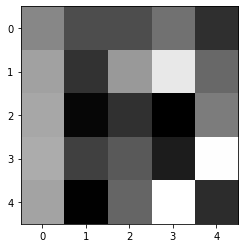

In [465]:
plt.imshow(mat1, cmap="gray")

In [466]:
# Matrix singular
sleft = np.matmul(mat1, mat1.T)
sright = np.matmul(mat1.T, mat1)
m, n = mat1.shape

In [467]:
def getNorm(vals):
    return math.sqrt(sum(list(map(lambda x: x**2, vals))))

In [468]:
def Householder(vec):
    beta = np.linalg.norm(vec)
    e1 = np.zeros(vec.shape, dtype=np.float64)
    e1[0] = 1.0 
    w = vec - beta * e1 
    if (np.linalg.norm(w) != 0):
        w = w / np.linalg.norm(w)
    return np.matrix(w, dtype=np.float64), beta

In [469]:
def biDiagonalize(mat):
    m, n = np.shape(mat)
    B = np.matrix(mat.copy(), dtype=np.float64)
    U = np.matrix(np.eye(m))
    V = np.matrix(np.eye(n))
    for k in range(min(m, n)):
        if k < m: 
            w, _ = Householder(B[k:, k])
            B[k:, k:] = B[k:, k:] - 2 * w @ (w.T @ B[k:, k:])
            U[k:, :] = U[k:, :] - 2 * w @ (w.T @ U[k:, :])
        
        if k < n - 1:
            w, _ = Householder(B[k, k + 1:])
            B[k:, k + 1:] = B[k:, k + 1:] - 2 * (B[k:, k + 1:] @ w.T) @ w
            V[:, k + 1:] = V[:, k + 1:] - 2 * (V[:, k + 1:] @ w.T) @ w

    U = U.T 
    return U, B, V

In [474]:
U, B, V = biDiagonalize(mat2)